# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Nofal Rafif Setiawan
- **Email:** nofal4314@gmail.com
- **ID Dicoding:** nofall431

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa banyak jumlah pengendara terdaftar dan casual per bulan?
- Pertanyaan 2: Musim apa yang memiliki jumlah pengendara sepeda tertinggi dan mengapa musim mempengaruhi peningkatan jumlah pengendara?
- Pertanyaan 3: Bagaimana perbandingan pengendara sepeda pada hari libur dan biasa?
- Pertanyaan 4: Apa hubungan jumlah total pengendara sepeda dengan suhu?

## Import Semua Packages/Library yang Digunakan

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

#### Memuat Data day.csv

In [232]:
day_df = pd.read_csv('https://raw.githubusercontent.com/NRafif/DicodingProject/38ea78f954c7720e327833a7e3fc6849503246ec/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat data hour.csv

In [233]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/NRafif/DicodingProject/38ea78f954c7720e327833a7e3fc6849503246ec/day.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Insight yang dapat diambil

**Insight:**
- Disini kita menampilkan data day_df dan hour_df
- Kita juga dapat melihat apa saja isi dan struktur yang terdapat dalam dataset ini

### Assessing Data

#### Menilai Data day_df

In [234]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [235]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [236]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [237]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [238]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [239]:
hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Insight yang dapat diambil

**Insight:**
- Terdapat kesalahan tipe data pada kolom dteday yang harusnya datetime menjadi object
- tidak ada duplikasi
- tidak terdapat missing value
- data terlalu rumit bagi awam untuk dibaca karena terlalu banyak kolom (season, yr, mnth, weekday, temp, hum) yang menggunakan kode angka
- ada inaccurate value dimana ada workingday dan holiday secara bersamaan

### Cleaning Data

#### Cleaning Data day_df

##### Mengganti tipe data kolom dteday

In [240]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

##### Mengubah tipe data kolom season dari Int ke Object

In [241]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].replace(season_mapping)
day_df['season'].head()

,season
0,Spring
1,Spring
2,Spring
3,Spring
4,Spring


##### Mengubah tipe data kolom yr dari Int ke Object

In [242]:
yr_mapping = {
    0: '2011',
    1: '2012'
}

day_df['yr'] = day_df['yr'].replace(yr_mapping)
day_df['yr'].head()

,yr
0,2011
1,2011
2,2011
3,2011
4,2011


##### Mengganti Tipe Data Mnth dari Int ke Object

In [243]:
mnth_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

day_df['mnth'] = day_df['mnth'].replace(mnth_mapping)
day_df['mnth'].head()

,mnth
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan


##### Mengganti Tipe Data weekday dari Int ke Object

In [244]:
weekday_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

day_df['weekday'] = day_df['weekday'].replace(weekday_mapping)
day_df['weekday'].head()

,weekday
0,Sun
1,Mon
2,Tue
3,Wed
4,Thu


##### Menyamakan Skala Data sesuai Instruksi README.txt

In [245]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

##### Pengelompokkan Data ke 3 kategori

In [246]:
temp2_bins = np.linspace(day_df['temp'].min(), day_df['temp'].max(), 4)
temp2_labels = ['Cold', 'Mild', 'Hot']
day_df['temp2'] = pd.cut(day_df['temp'], bins=temp2_bins, labels=temp2_labels, include_lowest=True)

hum2_bins = np.linspace(day_df['hum'].min(), day_df['hum'].max(), 4)
hum2_labels = ['Low', 'Medium', 'High']
day_df['hum2'] = pd.cut(day_df['hum'], bins=hum2_bins, labels=hum2_labels, include_lowest=True)

windspeed2_bins = np.linspace(day_df['windspeed'].min(), day_df['windspeed'].max(), 4)
windspeed2_labels = ['Calm', 'Breezy', 'Windy']
day_df['windspeed2'] = pd.cut(day_df['windspeed'], bins=windspeed2_bins, labels=windspeed2_labels, include_lowest=True)

##### Menambahkan kelompok diatas kedalam data

In [247]:
day_df = day_df[['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp','temp2', 'atemp', 'hum', 'hum2', 'windspeed', 'windspeed2',
       'casual', 'registered', 'cnt']]


##### Memperbaiki Inaccurate Value dari workingday dan holiday

In [248]:
day_df.loc[(day_df['workingday'] == 0) & (day_df['holiday'] == 0), 'workingday'] = 1


##### Mengecek Info Data day_df setelah proses cleansing

In [249]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  temp2       731 non-null    category      
 11  atemp       731 non-null    float64       
 12  hum         731 non-null    float64       
 13  hum2        731 non-null    category      
 14  windspeed   731 non-null    float64       
 15  windspeed2  731 non-null    category      
 16  casual      731 non-null  

In [250]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,temp2,atemp,hum,hum2,windspeed,windspeed2,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sun,1,2,14.110847,Mild,18.18125,80.5833,High,10.749882,Calm,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Mon,1,2,14.902598,Mild,17.68695,69.6087,High,16.652113,Breezy,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Tue,1,1,8.050924,Cold,9.47025,43.7273,Medium,16.636703,Breezy,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Wed,1,1,8.200000,Cold,10.60610,59.0435,Medium,10.739832,Calm,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Thu,1,1,9.305237,Cold,11.46350,43.6957,Medium,12.522300,Breezy,82,1518,1600


#### Cleaning Data hour_df

##### Mengganti tipe data kolom dteday

In [251]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

##### Mengubah tipe data kolom season dari Int ke Object

In [252]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

hour_df['season'] = hour_df['season'].replace(season_mapping)
hour_df['season'].head()

,season
0,Spring
1,Spring
2,Spring
3,Spring
4,Spring


##### Mengubah tipe data kolom yr dari Int ke Object

In [253]:
yr_mapping = {
    0: '2011',
    1: '2012'
}

hour_df['yr'] = hour_df['yr'].replace(yr_mapping)
hour_df['yr'].head()

,yr
0,2011
1,2011
2,2011
3,2011
4,2011


##### Mengubah tipe data kolom mnth dari Int ke Object

In [254]:
mnth_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

hour_df['mnth'] = hour_df['mnth'].replace(mnth_mapping)
hour_df['mnth'].head()

,mnth
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan


##### Mengubah tipe data kolom weekday dari Int ke Object

In [255]:
weekday_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)
hour_df['weekday'].head()

,weekday
0,Sun
1,Mon
2,Tue
3,Wed
4,Thu


##### Menyamakan Skala Data sesuai Instruksi README.txt

In [256]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

##### Pengelompokkan Data ke 3 kategori

In [257]:
temp2_bins = np.linspace(hour_df['temp'].min(), hour_df['temp'].max(), 4)
temp2_labels = ['Cold', 'Mild', 'Hot']
hour_df['temp2'] = pd.cut(hour_df['temp'], bins=temp2_bins, labels=temp2_labels, include_lowest=True)

hum2_bins = np.linspace(hour_df['hum'].min(), hour_df['hum'].max(), 4)
hum2_labels = ['Low', 'Medium', 'High']
hour_df['hum2'] = pd.cut(hour_df['hum'], bins=hum2_bins, labels=hum2_labels, include_lowest=True)

windspeed2_bins = np.linspace(hour_df['windspeed'].min(), hour_df['windspeed'].max(), 4)
windspeed2_labels = ['Calm', 'Breezy', 'Windy']
hour_df['windspeed2'] = pd.cut(hour_df['windspeed'], bins=windspeed2_bins, labels=windspeed2_labels, include_lowest=True)

##### Menambahkan kelompok diatas kedalam data

In [258]:
hour_df = hour_df[['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp','temp2', 'atemp', 'hum', 'hum2', 'windspeed', 'windspeed2',
       'casual', 'registered', 'cnt']]

##### Memperbaiki Inaccurate Value dari workingday dan holiday

In [259]:
hour_df.loc[(hour_df['workingday'] == 0) & (hour_df['holiday'] == 0), 'workingday'] = 1

##### Memeriksa Info Data hour_df setelah proses cleansing

In [260]:
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,temp2,atemp,hum,hum2,windspeed,windspeed2,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sun,1,2,14.110847,Mild,18.18125,80.5833,High,10.749882,Calm,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Mon,1,2,14.902598,Mild,17.68695,69.6087,High,16.652113,Breezy,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Tue,1,1,8.050924,Cold,9.47025,43.7273,Medium,16.636703,Breezy,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Wed,1,1,8.200000,Cold,10.60610,59.0435,Medium,10.739832,Calm,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Thu,1,1,9.305237,Cold,11.46350,43.6957,Medium,12.522300,Breezy,82,1518,1600


In [261]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  temp2       731 non-null    category      
 11  atemp       731 non-null    float64       
 12  hum         731 non-null    float64       
 13  hum2        731 non-null    category      
 14  windspeed   731 non-null    float64       
 15  windspeed2  731 non-null    category      
 16  casual      731 non-null  

##### Insight yang dapat diambil

**Insight:**
- memperbaiki tipe data dteday
- menyesuaikan data (season, yr, mnth, weekday) menjadi object agar lebih mudah dibaca
- menyesuaikan skala data (temp, atemp, hum, windspeed) sesuai instruksi readme.txt
- mengelompokkan skala data (temp, hum, windspeed) ke 3 kategori dan memasukkannya ke data baru
- memperbaiki inaccurate value workingday dan holiday dimana liburan tidak boleh bersamaan dengan hari kerja

## Exploratory Data Analysis (EDA)

### Explore ...

#### EDA day_df

##### Rangkuman parameter statistik pengendara sepeda data day_df

In [262]:
day_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


##### Eksplorasi total jumlah pengendara sepeda casual dan terdaftar berdasarkan musim, tahun, bulan, hari, cuaca, suhu, dan kelembapan

In [263]:
seasonal_counts_day = day_df.groupby(by='season')[['casual', 'registered']].sum().reset_index()

seasonal_counts_day['total_users'] = seasonal_counts_day['casual'] + seasonal_counts_day['registered']

day_df.head(5)

display(seasonal_counts_day[['season', 'casual', 'registered', 'total_users']])

,season,casual,registered,total_users
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


In [264]:
yr_counts_day = day_df.groupby(by='yr')[['casual', 'registered']].sum().reset_index()

yr_counts_day['total_users'] = yr_counts_day['casual'] + yr_counts_day['registered']

day_df.head(5)

display(yr_counts_day[['yr', 'casual', 'registered', 'total_users']])

,yr,casual,registered,total_users
0,2011,247252,995851,1243103
1,2012,372765,1676811,2049576


In [265]:
mnth_counts_day = day_df.groupby(by='mnth')[['casual', 'registered']].sum().reset_index()

mnth_counts_day['total_users'] = mnth_counts_day['casual'] + mnth_counts_day['registered']

day_df.head(5)

display(mnth_counts_day[['mnth', 'casual', 'registered', 'total_users']])

,mnth,casual,registered,total_users
0,Apr,60802,208292,269094
1,Aug,72039,279155,351194
2,Dec,21693,189343,211036
3,Feb,14963,136389,151352
4,Jan,12042,122891,134933
5,Jul,78157,266791,344948
6,Jun,73906,272436,346342
7,Mar,44444,184476,228920
8,May,75285,256401,331686
9,Nov,36603,218228,254831


In [266]:
weekday_counts_day = day_df.groupby(by='weekday')[['casual', 'registered']].sum().reset_index()

weekday_counts_day['total_users'] = weekday_counts_day['casual'] + weekday_counts_day['registered']

day_df.head(5)

display(weekday_counts_day[['weekday', 'casual', 'registered', 'total_users']])

,weekday,casual,registered,total_users
0,Fri,61460,423935,485395
1,Mon,140521,303506,444027
2,Sat,78238,409552,487790
3,Sun,153852,323955,477807
4,Thu,57319,415729,473048
5,Tue,70784,384719,455503
6,Wed,57843,411266,469109


In [267]:
weathersit_counts_day = day_df.groupby(by='weathersit')[['casual', 'registered']].sum().reset_index()

weathersit_counts_day['total_users'] = weathersit_counts_day['casual'] + weathersit_counts_day['registered']

day_df.head(5)

display(weathersit_counts_day[['weathersit', 'casual', 'registered', 'total_users']])

,weathersit,casual,registered,total_users
0,1,446346,1811606,2257952
1,2,169776,827082,996858
2,3,3895,33974,37869


In [268]:
temp2_counts_day = day_df.groupby(by='temp2')[['casual', 'registered']].sum().reset_index()

temp2_counts_day['total_users'] = temp2_counts_day['casual'] + temp2_counts_day['registered']

day_df.head(5)

display(temp2_counts_day[['temp2', 'casual', 'registered', 'total_users']])

<ipython-input-268-6f9f41191e63>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2_counts_day = day_df.groupby(by='temp2')[['casual', 'registered']].sum().reset_index()


,temp2,casual,registered,total_users
0,Cold,45084,391647,436731
1,Mild,250930,1114973,1365903
2,Hot,324003,1166042,1490045


In [269]:
hum2_counts_day = day_df.groupby(by='hum2')[['casual', 'registered']].sum().reset_index()

hum2_counts_day['total_users'] = hum2_counts_day['casual'] + hum2_counts_day['registered']

day_df.head(5)

display(hum2_counts_day[['hum2', 'casual', 'registered', 'total_users']])

<ipython-input-269-1d3d6af8cb12>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum2_counts_day = day_df.groupby(by='hum2')[['casual', 'registered']].sum().reset_index()


,hum2,casual,registered,total_users
0,Low,9592,31543,41135
1,Medium,345124,1499550,1844674
2,High,265301,1141569,1406870


In [270]:
windspeed2_counts_day = day_df.groupby(by='windspeed2')[['casual', 'registered']].sum().reset_index()

windspeed2_counts_day['total_users'] = windspeed2_counts_day['casual'] + windspeed2_counts_day['registered']

day_df.head(5)

display(windspeed2_counts_day[['windspeed2', 'casual', 'registered', 'total_users']])

<ipython-input-270-3a40a8dbf114>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed2_counts_day = day_df.groupby(by='windspeed2')[['casual', 'registered']].sum().reset_index()


,windspeed2,casual,registered,total_users
0,Calm,351756,1508061,1859817
1,Breezy,254804,1074055,1328859
2,Windy,13457,90546,104003


##### Mencari Mode dari setiap kolom

In [271]:
categorical_columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp2', 'hum2', 'windspeed2']
mode_values = day_df[categorical_columns].mode().iloc[0]
print("Mode Values:")
print(mode_values)

Mode Values:
season          Fall
yr              2012
mnth             Aug
weekday          Mon
weathersit       1.0
temp2           Mild
hum2          Medium
windspeed2      Calm
Name: 0, dtype: object


#### EDA hour_df

##### Rangkuman parameter statistik data hour_df

In [272]:
hour_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,848.176471,3656.172367,4504.348837
std,686.622488,1560.256377,1937.211452
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5956.000000
max,3410.000000,6946.000000,8714.000000


##### Perbandingan jumlah pengendara sepeda casual dan terdaftar berdasarkan musim, tahun, bulan, hari, cuaca, suhu, dan kelembapan menggunakan persen

In [273]:
seasonal_data_hour = hour_df.groupby('season')[['casual', 'registered']].sum().reset_index()

seasonal_data_hour['total_users'] = seasonal_data_hour['casual'] + seasonal_data_hour['registered']

seasonal_data_hour['casual_percentage'] = (seasonal_data_hour['casual'] / seasonal_data_hour['total_users']) * 100
seasonal_data_hour['registered_percentage'] = (seasonal_data_hour['registered'] / seasonal_data_hour['total_users']) * 100

hour_df.head(5)

display(seasonal_data_hour[['season', 'casual_percentage', 'registered_percentage']])

,season,casual_percentage,registered_percentage
0,Fall,21.306646,78.693354
1,Spring,12.861410,87.138590
2,Summer,22.155937,77.844063
3,Winter,15.420627,84.579373


In [274]:
yr_data_hour = hour_df.groupby('yr')[['casual', 'registered']].sum().reset_index()

yr_data_hour['total_users'] = yr_data_hour['casual'] + yr_data_hour['registered']

yr_data_hour['casual_percentage'] = (yr_data_hour['casual'] / yr_data_hour['total_users']) * 100
yr_data_hour['registered_percentage'] = (yr_data_hour['registered'] / yr_data_hour['total_users']) * 100

hour_df.head(5)

display(yr_data_hour[['yr', 'casual_percentage', 'registered_percentage']])

,yr,casual_percentage,registered_percentage
0,2011,19.889905,80.110095
1,2012,18.187420,81.812580


In [275]:
monthly_data_hour = hour_df.groupby('mnth')[['casual', 'registered']].sum().reset_index()

monthly_data_hour['total_users'] = monthly_data_hour['casual'] + monthly_data_hour['registered']

monthly_data_hour['casual_percentage'] = (monthly_data_hour['casual'] / monthly_data_hour['total_users']) * 100
monthly_data_hour['registered_percentage'] = (monthly_data_hour['registered'] / monthly_data_hour['total_users']) * 100

hour_df.head(5)

display(monthly_data_hour[['mnth', 'casual_percentage', 'registered_percentage']])

,mnth,casual_percentage,registered_percentage
0,Apr,22.595078,77.404922
1,Aug,20.512594,79.487406
2,Dec,10.279289,89.720711
3,Feb,9.886225,90.113775
4,Jan,8.924429,91.075571
5,Jul,22.657618,77.342382
6,Jun,21.339023,78.660977
7,Mar,19.414643,80.585357
8,May,22.697672,77.302328
9,Nov,14.363637,85.636363


In [276]:
average_casual_percentage = monthly_data_hour['casual_percentage'].mean()
average_registered_percentage = monthly_data_hour['registered_percentage'].mean()

print(f"\nRata-rata Persentase Pengendara Casual: {average_casual_percentage:.2f}%")
print(f"Rata-rata Persentase Pengendara Registered: {average_registered_percentage:.2f}%")


Rata-rata Persentase Pengendara Casual: 17.63%
Rata-rata Persentase Pengendara Registered: 82.37%


In [277]:
weekday_data_hour = hour_df.groupby('weekday')[['casual', 'registered']].sum().reset_index()

weekday_data_hour['total_users'] = weekday_data_hour['casual'] + weekday_data_hour['registered']

weekday_data_hour['casual_percentage'] = (weekday_data_hour['casual'] / weekday_data_hour['total_users']) * 100
weekday_data_hour['registered_percentage'] = (weekday_data_hour['registered'] / weekday_data_hour['total_users']) * 100

hour_df.head(5)

display(weekday_data_hour[['weekday', 'casual_percentage', 'registered_percentage']])

,weekday,casual_percentage,registered_percentage
0,Fri,12.661853,87.338147
1,Mon,31.646949,68.353051
2,Sat,16.039279,83.960721
3,Sun,32.199612,67.800388
4,Thu,12.116952,87.883048
5,Tue,15.539744,84.460256
6,Wed,12.330397,87.669603


In [278]:
weathersit_data_hour = hour_df.groupby('weathersit')[['casual', 'registered']].sum().reset_index()

weathersit_data_hour['total_users'] = weathersit_data_hour['casual'] + weathersit_data_hour['registered']

weathersit_data_hour['casual_percentage'] = (weathersit_data_hour['casual'] / weathersit_data_hour['total_users']) * 100
weathersit_data_hour['registered_percentage'] = (weathersit_data_hour['registered'] / weathersit_data_hour['total_users']) * 100

hour_df.head(5)

display(weathersit_data_hour[['weathersit', 'casual_percentage', 'registered_percentage']])

,weathersit,casual_percentage,registered_percentage
0,1,19.767736,80.232264
1,2,17.031112,82.968888
2,3,10.285458,89.714542


In [279]:
temp2_data_hour = hour_df.groupby('temp2')[['casual', 'registered']].sum().reset_index()

temp2_data_hour['total_users'] = temp2_data_hour['casual'] + temp2_data_hour['registered']

temp2_data_hour['casual_percentage'] = (temp2_data_hour['casual'] / temp2_data_hour['total_users']) * 100
temp2_data_hour['registered_percentage'] = (temp2_data_hour['registered'] / temp2_data_hour['total_users']) * 100

hour_df.head(5)

display(temp2_data_hour[['temp2', 'casual_percentage', 'registered_percentage']])

<ipython-input-279-25b5b215b605>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2_data_hour = hour_df.groupby('temp2')[['casual', 'registered']].sum().reset_index()


,temp2,casual_percentage,registered_percentage
0,Cold,10.323059,89.676941
1,Mild,18.370997,81.629003
2,Hot,21.744511,78.255489


In [280]:
hum2_data_hour = hour_df.groupby('hum2')[['casual', 'registered']].sum().reset_index()

hum2_data_hour['total_users'] = hum2_data_hour['casual'] + hum2_data_hour['registered']

hum2_data_hour['casual_percentage'] = (hum2_data_hour['casual'] / hum2_data_hour['total_users']) * 100
hum2_data_hour['registered_percentage'] = (hum2_data_hour['registered'] / hum2_data_hour['total_users']) * 100

hour_df.head(5)

display(hum2_data_hour[['hum2', 'casual_percentage', 'registered_percentage']])

<ipython-input-280-5730ada1c751>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum2_data_hour = hour_df.groupby('hum2')[['casual', 'registered']].sum().reset_index()


,hum2,casual_percentage,registered_percentage
0,Low,23.318342,76.681658
1,Medium,18.709214,81.290786
2,High,18.857535,81.142465


In [281]:
windspeed2_data_hour = hour_df.groupby('windspeed2')[['casual', 'registered']].sum().reset_index()

windspeed2_data_hour['total_users'] = windspeed2_data_hour['casual'] + windspeed2_data_hour['registered']

windspeed2_data_hour['casual_percentage'] = (windspeed2_data_hour['casual'] / windspeed2_data_hour['total_users']) * 100
windspeed2_data_hour['registered_percentage'] = (windspeed2_data_hour['registered'] / windspeed2_data_hour['total_users']) * 100

hour_df.head(5)

display(windspeed2_data_hour[['windspeed2', 'casual_percentage', 'registered_percentage']])

<ipython-input-281-8f4262941c59>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed2_data_hour = hour_df.groupby('windspeed2')[['casual', 'registered']].sum().reset_index()


,windspeed2,casual_percentage,registered_percentage
0,Calm,18.913474,81.086526
1,Breezy,19.174645,80.825355
2,Windy,12.939050,87.060950


##### Mencari Mode dari setiap kolom

In [282]:
categorical_columns = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp2', 'hum2', 'windspeed2']
mode_values = hour_df[categorical_columns].mode().iloc[0]
print("Mode Values:")
print(mode_values)

Mode Values:
season          Fall
yr              2012
mnth             Aug
weekday          Mon
weathersit       1.0
temp2           Mild
hum2          Medium
windspeed2      Calm
Name: 0, dtype: object


#### Insight yang dapat diambil

- Parameter Statistik menunjukkan bahwa jumlah rata-rata penyewaan sepeda adalah sekitar 4500
- standar devasi sekitar 1900
- Pengendara casual memiliki jumlah sewa rata rata sekitar 800, sementara pengendara terdaftar sekitar 3600
- pengelompokan total berdasarkan musim menunjukkan pengendara paling banyak pada musim semi dan paling sedikit pada musim gugur
- berdasarkan pengelompokan diatas pengendara paling banyak ada saat suhu dan bulan bulan hangat


## Visualization & Explanatory Analysis

### Pertanyaan 1: berapa banyak jumlah pengendara terdaftar dan casual per bulan?

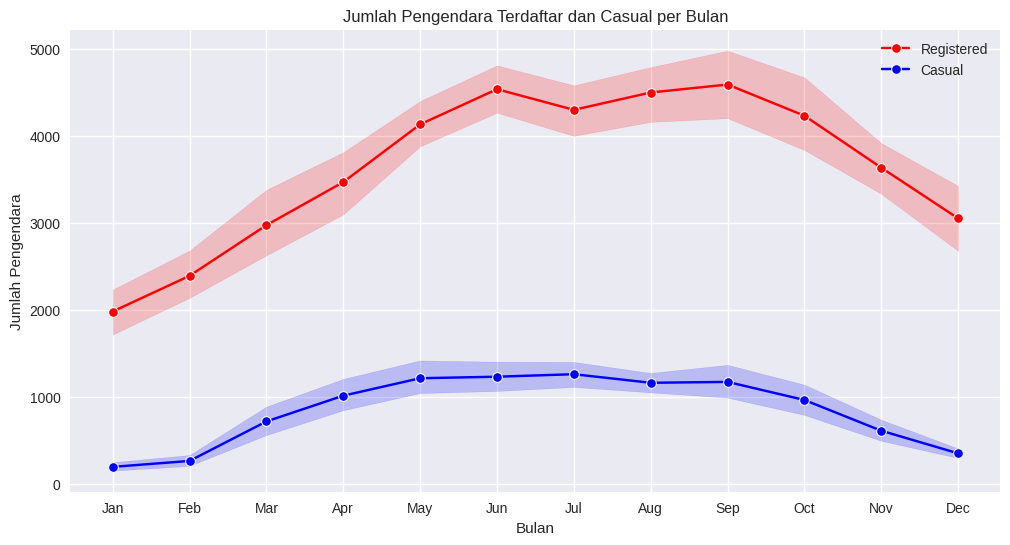

In [283]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='mnth', y='registered',marker='o', label='Registered', color='red')
sns.lineplot(data=day_df, x='mnth', y='casual',marker='o', label='Casual', color='blue')
plt.title('Jumlah Pengendara Terdaftar dan Casual per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengendara')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Berapa banyak total pengendara sepeda menurut musim?

<ipython-input-284-f23167817931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_df, x='season', y='cnt', palette=colors_)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

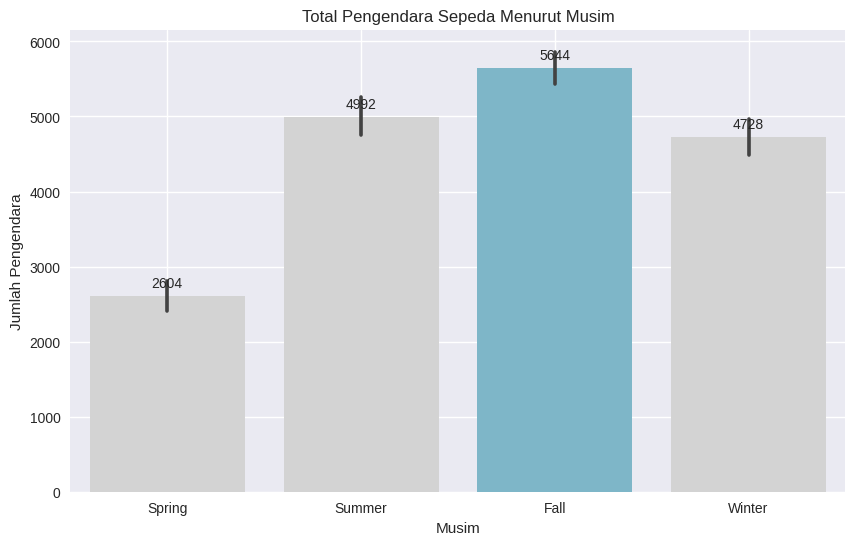

In [284]:
plt.figure(figsize=(10, 6))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
ax = sns.barplot(data=day_df, x='season', y='cnt', palette=colors_)
plt.title('Total Pengendara Sepeda Menurut Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengendara')
plt.grid(True)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()

### Pertanyaan 3: bagaimana perbandingan pengendara sepeda pada hari libur dan biasa?

<ipython-input-285-4b0a9bb32f12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='workingday', y='cnt', palette=colors_)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


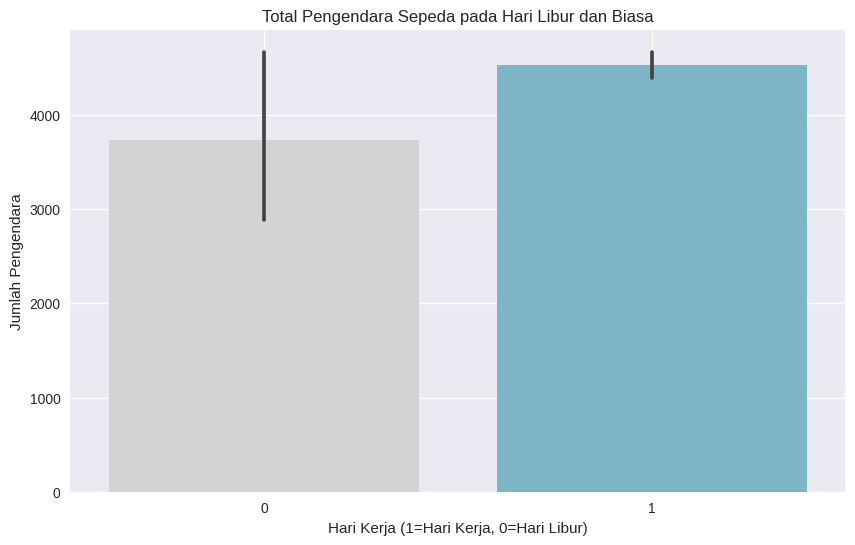

In [285]:
plt.figure(figsize=(10, 6))
colors_ = ["#D3D3D3", "#72BCD4"]
sns.barplot(data=hour_df, x='workingday', y='cnt', palette=colors_)
plt.title('Total Pengendara Sepeda pada Hari Libur dan Biasa')
plt.xlabel('Hari Kerja (1=Hari Kerja, 0=Hari Libur)')
plt.ylabel('Jumlah Pengendara')
plt.grid(True)
plt.show()

### Pertanyaan 4: Apa hubungan jumlah total pengendara sepeda dengan suhu?

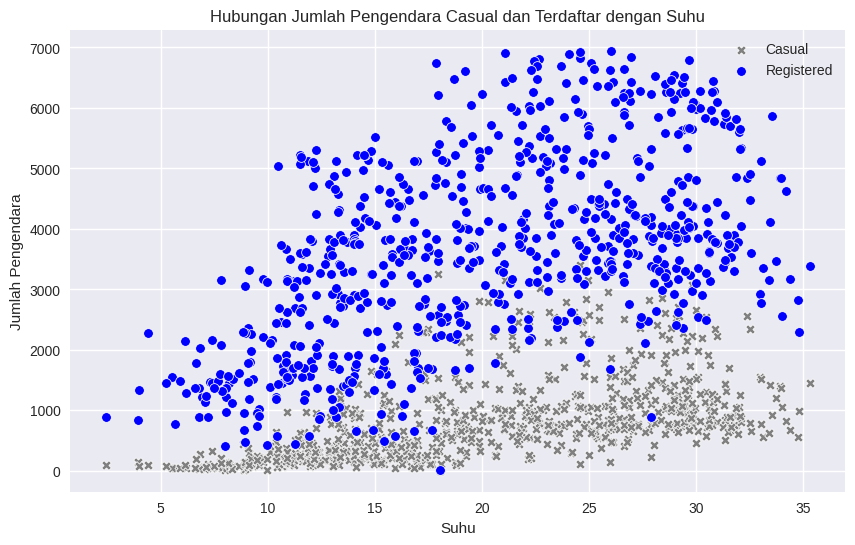

In [286]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='casual', marker='X', label='Casual', color='gray')
sns.scatterplot(data=day_df, x='temp', y='registered', marker='o', label='Registered', color='blue')
plt.title('Hubungan Jumlah Pengendara Casual dan Terdaftar dengan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengendara')
plt.legend()
plt.grid(True)
plt.show()

### Insight yang dapat di ambil

**Insight:**
- Menurut trend pengendara sepeda terbanyak terdapat pada bulan september
- Pada musim gugur total pengendara lebih banyak dibanding musim lainnya
- Hari biasa memiliki jumlah pengguna yang lebih tinggi dibandingkan dengan hari libur
- semakin hangat suhu semakin banyak jumlah pengendara sepeda baik casual dan terdaftar

## Analisis Lanjutan (Opsional)

### RFM analysis

In [287]:
latest_date = day_df['dteday'].max()
day_df['recency'] = (latest_date - day_df['dteday']).dt.days

frequency_df = day_df.groupby('instant')['cnt'].sum().reset_index()
frequency_df = frequency_df.rename(columns={'cnt': 'frequency'})

monetary_df = day_df.groupby('instant')['cnt'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'cnt': 'monetary'})

rfm_df = day_df[['instant', 'recency']].merge(frequency_df, on='instant').merge(monetary_df, on='instant')

rfm_df.head()

,instant,recency,frequency,monetary
0,1,730,985,985
1,2,729,801,801
2,3,728,1349,1349
3,4,727,1562,1562
4,5,726,1600,1600


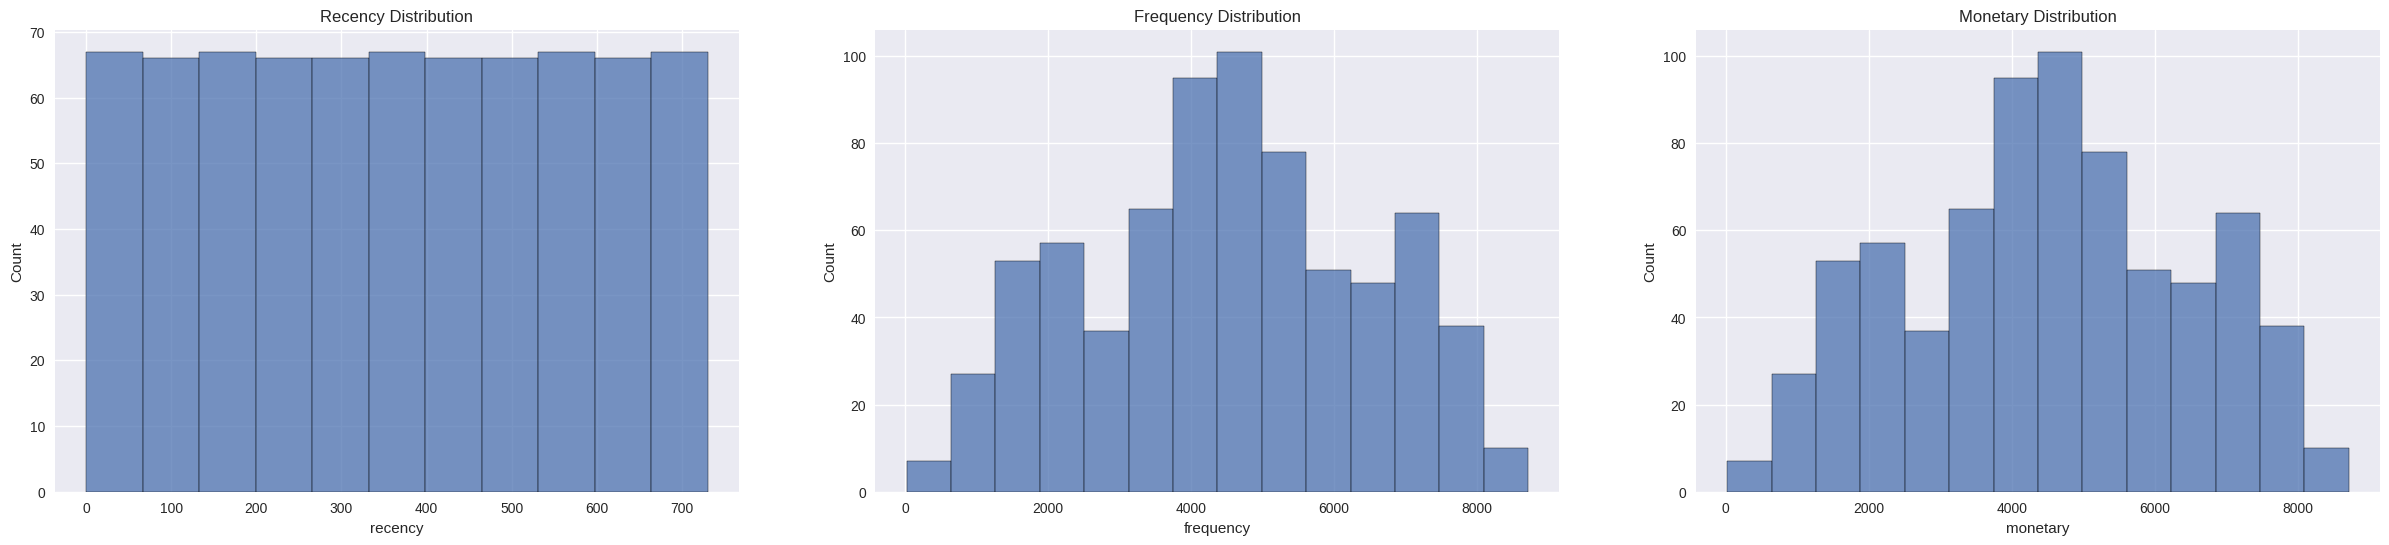

In [288]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
sns.histplot(rfm_df['recency'], ax=ax[0])
ax[0].set_title('Recency Distribution')

sns.histplot(rfm_df['frequency'], ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['monetary'], ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.show()

### Geospatial analysis

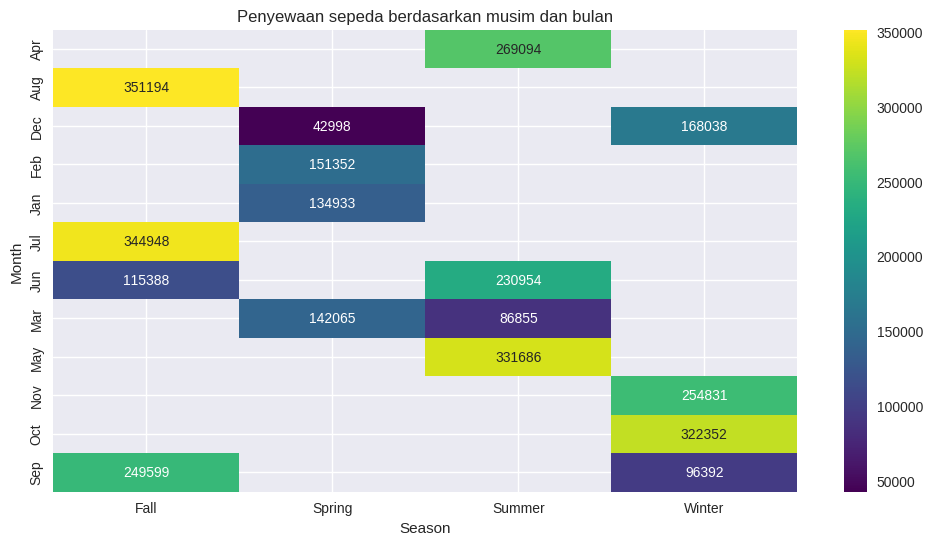

In [289]:
plt.figure(figsize=(12, 6))
heatmap_data = day_df.groupby(['mnth', 'season'])['cnt'].sum().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis")
plt.title('Penyewaan sepeda berdasarkan musim dan bulan')
plt.xlabel('Season')
plt.ylabel('Month')
plt.show()

## Conclusion

Conclution Pertanyaan 1: Berdasarkan analisis yang dilakukan diatas terdapat rata rata sekitar 3600 pengendara terdaftar dan 800 pengendara casual untuk setiap bulannya dengan rata rata perbandingan 83:17.

Conclution Pertanyaan 2: Musim Fall/Gugur ternyata memiliki jumlah pengendara tertinggi dengan total sekitar 5600 pengendara dibandingkan musim lainnya. kemungkinan disebabkan bersepeda di musim gugur mungkin lebih nyaman karena suhunya lebih sejuk dibandingkan musim panas, dan pengendara sepeda cenderung menghindari cuaca yang terlalu panas atau dingin, dan musim gugur menawarkan keseimbangan yang ideal.

Conclution Pertanyaan 3: Terdapat pengendara yang lebih banyak di hari kerja dibanding hari libur. ada beberapa faktor yang dapat menyebabkan hal tersebut seperti penggunaan sepeda sebagai sarana transportasi untuk pergi berkerja atau bersekolah untuk menghindari kemacetan di kota besar, sudah menjadi rutinitas atau terbiasa, dan beberapa faktor lainnya

Conclution Pertanyaan 4: Kondisi suhu juga cuaca, musim, dan waktu adalah beberapa faktor utama yang memengaruhi penyewaan pengendara sepeda. Hasil analisis menunjukkan bahwa suhu, musim, dan kelembaban sangat penting untuk pola penyewaan sepeda. Suhu optimal untuk bersepeda, biasanya antara 15°C hingga 30°C, dianggap paling nyaman, sehingga pada rentang suhu ini jumlah pengendara cenderung lebih tinggi.

In [290]:
all_df = pd.concat([day_df, hour_df])

In [291]:
all_df.to_csv("all_data.csv", index=False)